# Dealing with Categorical Variables - Lab

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [2]:
# Your code here - load the dataset
ames = pd.read_csv("ames.csv", index_col=0)

Visually inspect `ames` (it's ok if you can't see all of the columns).

In [3]:
# Your code here
ames.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [4]:
# Your code here - drop columns with missing data
print(f"Shape Before: {ames.shape}")
ames = ames.dropna(axis='columns')
print(f"Shape After: {ames.shape}")

Shape Before: (1460, 80)
Shape After: (1460, 61)


## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

In [5]:
ames.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [6]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  YearBuilt      1460 non-null   int64 
 17  YearRemodAdd   1460 non-null   int64 
 18  RoofStyle      1460 non-null   ob

### Continuous Numeric Predictor

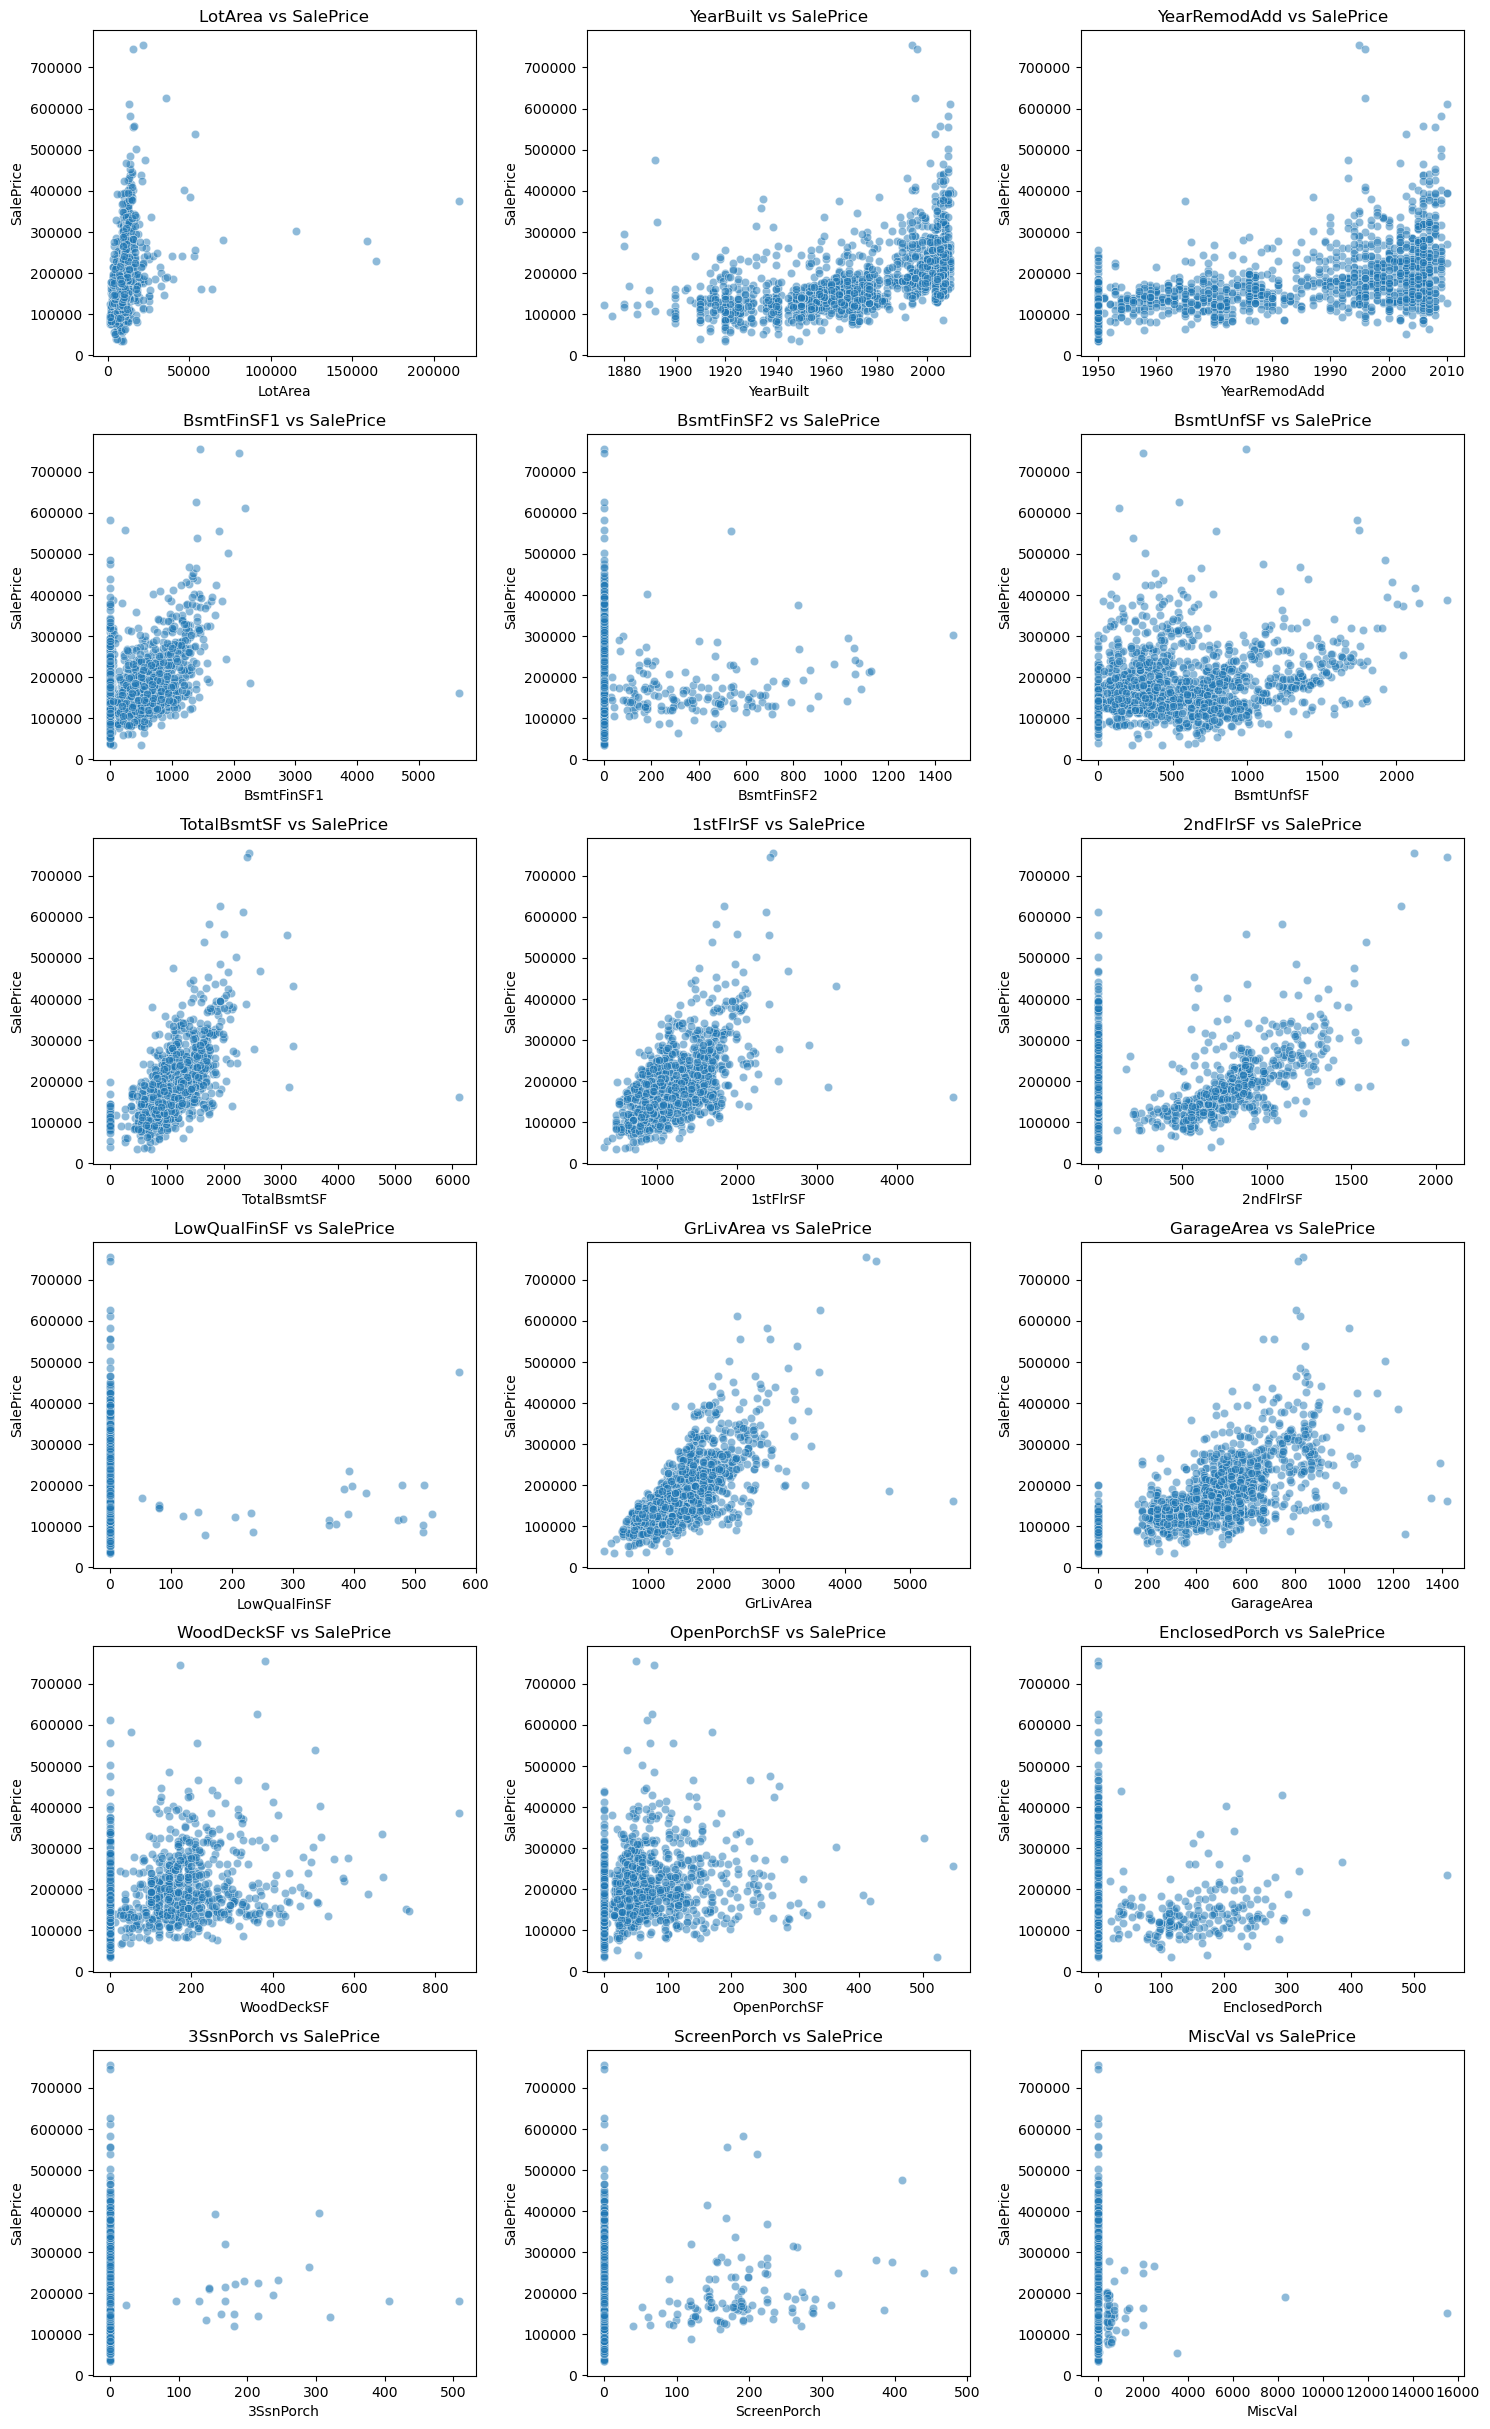

In [7]:
# Your code here - continuous numeric predictor
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = ames.select_dtypes(include='number').columns.drop('SalePrice')
continuous = [col for col in numeric_cols if ames[col].nunique() >= 20]
# Setting up subplots
n_cols = 3
n_rows = (len(continuous) // n_cols) + 1
plt.figure(figsize=(15, n_rows * 4))

for i, col in enumerate(continuous, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(x=ames[col], y=ames['SalePrice'], alpha=0.5)
    plt.title(f"{col} vs SalePrice")
    plt.tight_layout()

plt.show()

### Discrete Numeric Predictor

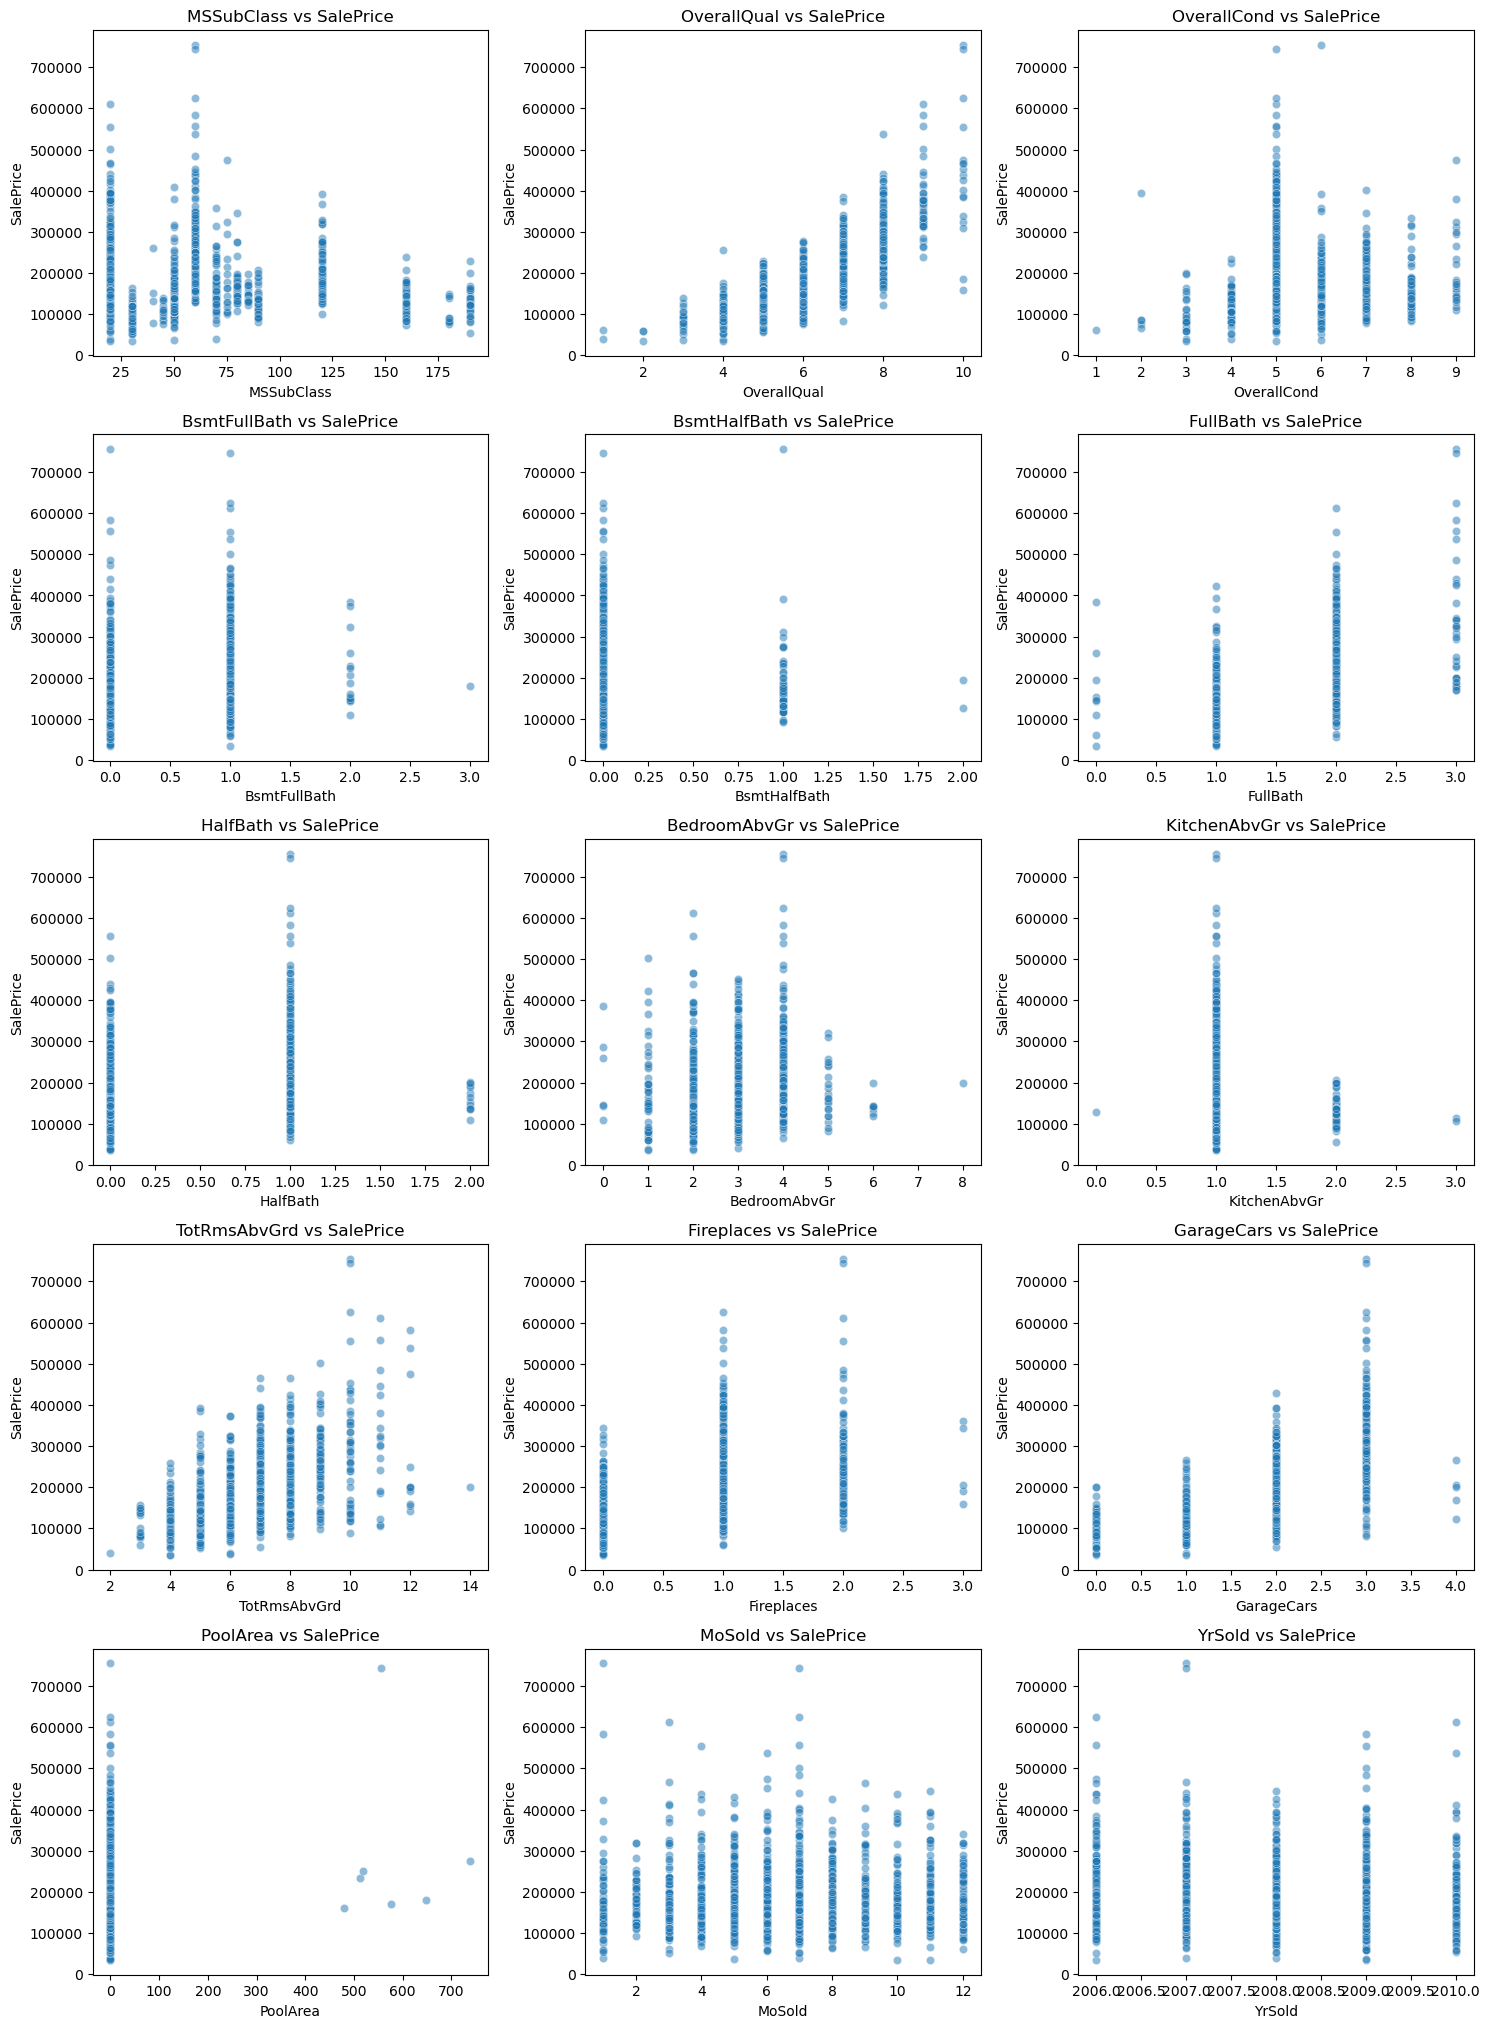

In [8]:
# Your code here - discrete numeric predictor
discrete = [col for col in numeric_cols if ames[col].nunique() < 20]
# Setting up subplots
n_cols = 3
n_rows = (len(discrete) // n_cols) + 1
plt.figure(figsize=(15, n_rows * 4))

for i, col in enumerate(discrete, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(x=ames[col], y=ames['SalePrice'], alpha=0.5)
    plt.title(f"{col} vs SalePrice")
    plt.tight_layout()

plt.show()

### String Categorical Predictor

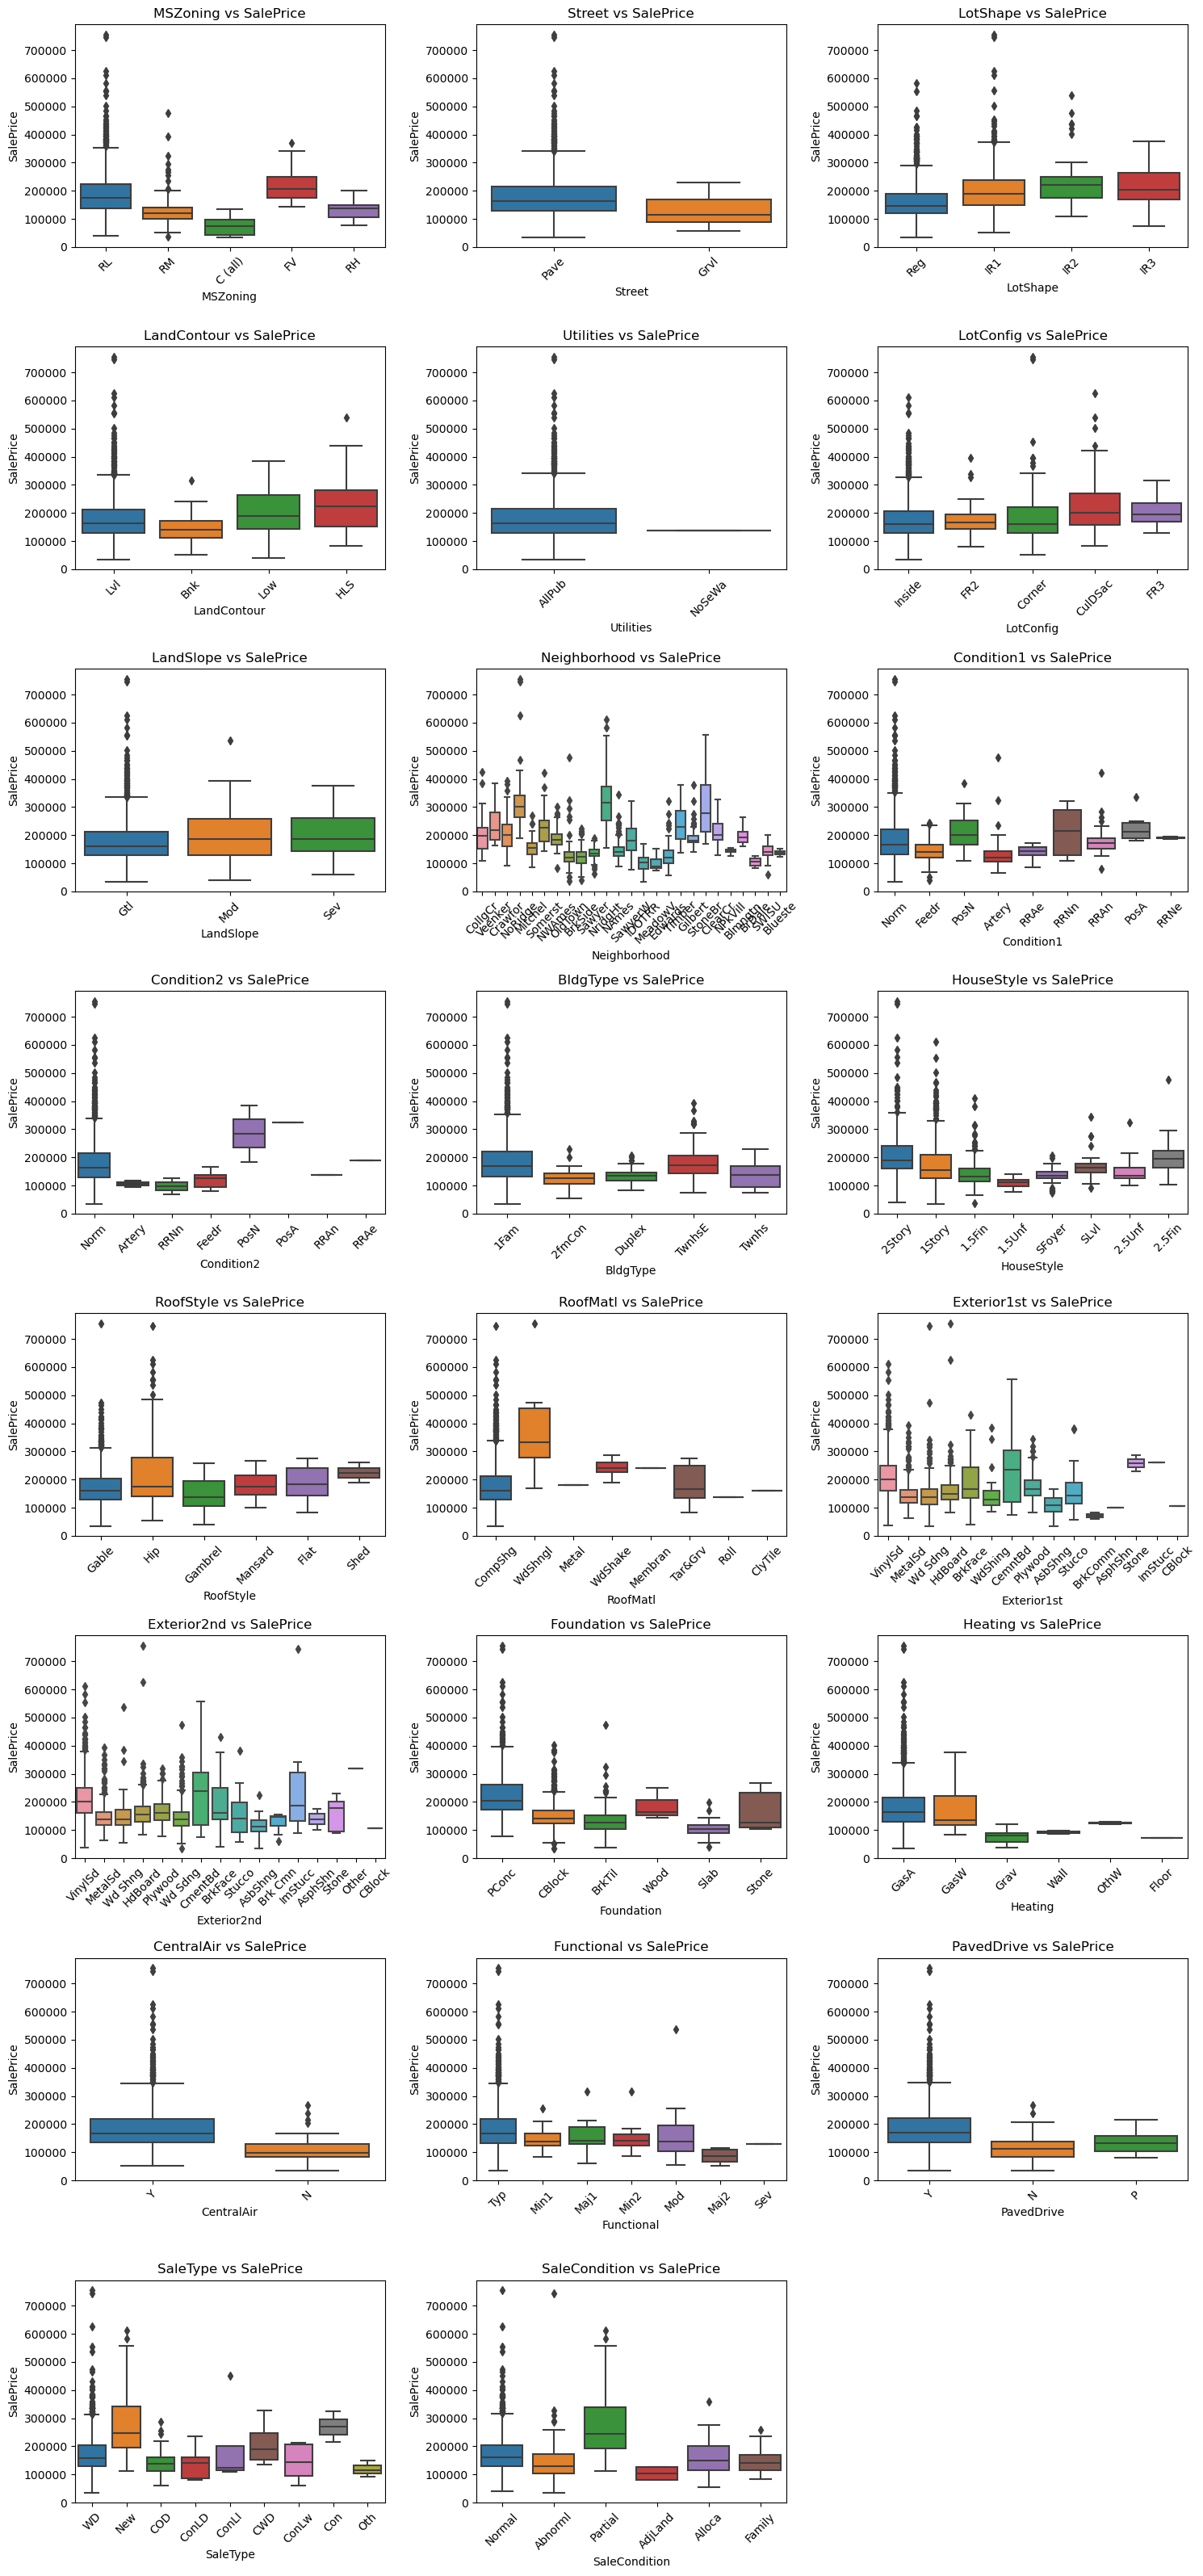

In [9]:
# Your code here - string categorical predictor
string_cat = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation','Heating','CentralAir','Functional','PavedDrive','SaleType','SaleCondition']

n_cols = 3
n_rows = (len(string_cat)//n_cols) + 1
plt.figure(figsize=(15, n_rows*4))

for i, col in enumerate(string_cat,1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=ames[col], y=ames['SalePrice'])
    plt.title(f"{col} vs SalePrice")
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()


### Discrete Categorical Predictor

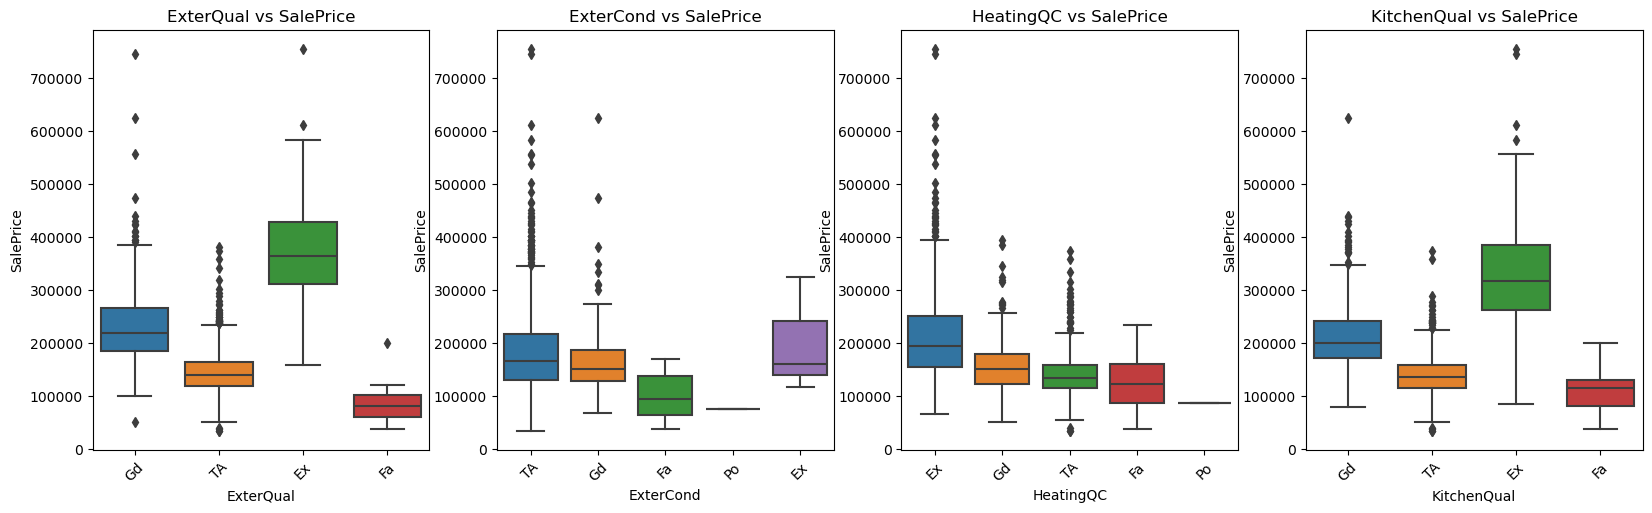

In [10]:
# Your code here - discrete categorical predictor
discrete_cat = ['ExterQual','ExterCond','HeatingQC','KitchenQual']
n_cols = 4
n_rows = (len(discrete_cat)//n_cols)+1

plt.figure(figsize=(20,n_rows*6))

for i, col in enumerate(discrete_cat, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=ames[col], y=ames['SalePrice'])
    plt.title(f"{col} vs SalePrice")
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    plt.xticks(rotation=45)

plt.show()

I will use the `GrLivArea` for the continous numeric predictor and `OverallQual` for discrete numeric predictor since they show a close relationship with the target attribute. On the other hand, `KitchenQual` and `Neighborhood` have a few outliers and will form the string and discrete categorical columns.

## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [11]:
# Your code here - prepare X and y, including one-hot encoding
X = ames[['GrLivArea', 'OverallQual', 'KitchenQual']]
y = ames['SalePrice']
X = pd.get_dummies(X, columns=['KitchenQual'],  drop_first=True, dtype=int)
X 

,GrLivArea,OverallQual,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
Id,,,,,
1,1710,7,0,1,0
2,1262,6,0,0,1
3,1786,7,0,1,0
4,1717,7,0,1,0
5,2198,8,0,1,0
...,...,...,...,...,...
1456,1647,6,0,0,1
1457,2073,6,0,0,1
1458,2340,7,0,1,0


#### Your answer here - which category or categories were dropped?
KitchenQual=='Ex' was dropped.

In [12]:
# Your code here - build a regression model and display results
import statsmodels.api as sm
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     872.7
Date:                Wed, 20 Aug 2025   Prob (F-statistic):               0.00
Time:                        07:49:22   Log-Likelihood:                -17532.
No. Observations:                1460   AIC:                         3.508e+04
Df Residuals:                    1454   BIC:                         3.511e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.227e+04   9385.790      1.

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (

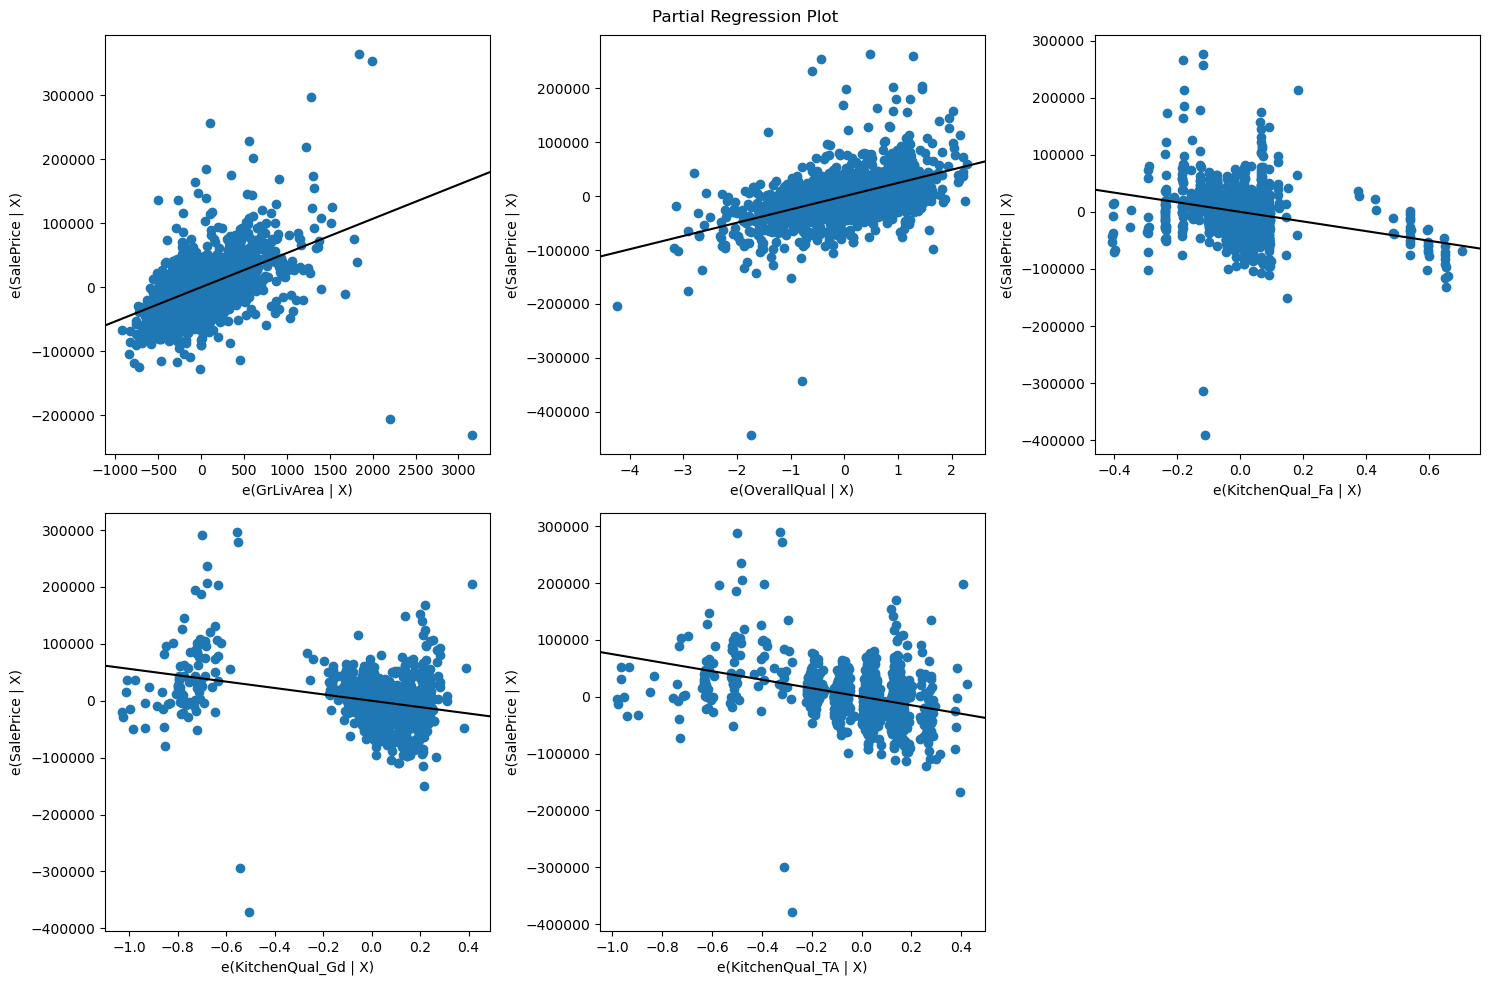

In [13]:
# Your code here - create partial regression plots
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_partregress_grid(
    results,
    exog_idx=list(X.columns),
    grid=(2,3),
    fig=fig)
plt.tight_layout()
plt.show()

## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [14]:
# Your code here - calculate an error-based metric
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = results.predict(sm.add_constant(X))
print(f"MAE: {mean_absolute_error(y,y_pred)}")
print(f"RMSE: {mean_squared_error(y,y_pred, squared=False)}")

MAE: 26538.479714547837
RMSE: 39701.8714484931


## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

#### OLS Regression Summary: SalePrice

The model is statistically significant overall and explains approximately **75%** of the variance in `SalePrice`. On average, its predictions are off by about **$26.5k**.  

All of the included coefficients are statistically significant. Key interpretations are:

Intercept (const)
- When above-grade living area and overall quality are 0, and the kitchen quality is "Ex" (the reference category), the expected home sale price is approximately **$12.3k**.

GrLivArea
- Each additional square foot of above-grade living area is associated with an increase of about **$53** in sale price.

OverallQual
- Each one-unit increase in overall quality corresponds to an increase of about **$24.6k** in sale price.

KitchenQual (dummy variables)
Compared to "Ex" (Excellent), lower kitchen quality levels are associated with decreases in sale price:
- **Fa:** -$84.2k 

- **Gd:** -$56.0k 

- **TA:** -$74.9k 



## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [17]:
# Your code here
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

X_sklearn = ames[['GrLivArea', 'OverallQual', 'KitchenQual']].copy()
ohe = OneHotEncoder()
columns = ['KitchenQual']
encoded = ohe.fit_transform(X_sklearn[columns])
new_df = pd.DataFrame(encoded.todense(), columns=ohe.get_feature_names_out(),index=X_sklearn.index)


X_new = pd.concat([X_sklearn.drop('KitchenQual', axis=1),new_df], axis=1)
lr = LinearRegression()
lr.fit(X_new, y)

print(lr.score(X_new, y))

0.7500727073404234


## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.